# Introdução a Aprendizado de Máquina

## Introdução

Utilizaremos a base de dados iris para esse tutorial. Essa é uma base de dados bastante conhecida contendo medidas das pétalas e sépalas da flor de íris. Os dados estão contidos em um arquivo chamado `Iris_Data.csv` encontrado no diretório [data](data).

In [4]:
import os
data_path = ['data']

## Exercício 1

Carregue os dados do arquivo usando as técnicas do tutorial *Introduction_to_Machine_Learning_and_Toolkit*. Examine o arquivo.

Indique o seguinte:

* O número de pontos (linhas) (*Dica:* verifique o atributo `.shape` do dataframe.)
* O nome das colunas. (*Dica:* verifique o atributo `.columns` do dataframe.)
* Os tipos associados a cada coluna. (*Dica:* verifique o atributo `.dtypes` do dataframe.)

In [5]:
import pandas as pd
data_iris= pd.read_csv('data/Iris_Data.csv')

**O número de pontos (linhas) (Dica: verifique o atributo .shape do dataframe.)**

In [6]:
data_iris.shape

(150, 5)

**O nome das colunas. (Dica: verifique o atributo .columns do dataframe.)**

In [7]:
data_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

**Os tipos associados a cada coluna. (Dica: verifique o atributo .dtypes do dataframe.)**

In [8]:
data_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Exercício 2

Examine os nomes das espécies e note que todas elas começam com 'Iris-'. Remova essa parte do nome para tornar o nome mais curto. 

*Dica:* tem várias maneiras de fazer isso, você pode usar o [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) ou o [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html), por exemplo.

In [9]:
data_iris['species'].replace('Iris-setosa','setosa',inplace=True)
data_iris['species'].replace('Iris-virginica','virginica',inplace=True)
data_iris['species'].replace('Iris-versicolor','versicolor',inplace=True)

## Exercício 3

Determine:
* A quantidade de cada espécie presente na base. (*Dica:* verifique o método `.value_counts` da série.)
* A média, mediana, quantis e faixas (máximo-mínimo) para cada medida de pétala e sépala.

*Dica:* para a última parte, o método `.describe` tem mediana, mas é chamada de *50%* quantile. `.describe` não tem faixa, portanto você precisará criar uma nova entrada na tabela com `max - min`.

In [10]:
data_iris.species.value_counts(bins=None)

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

### Média

In [11]:
data_iris.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

### Mediana

In [12]:
data_iris.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

### Máximas

In [13]:
data_iris.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

### Mínimas

In [14]:
data_iris.min()

sepal_length       4.3
sepal_width          2
petal_length         1
petal_width        0.1
species         setosa
dtype: object

## Exercício 4

Calcule **para cada espécie** em um dataframe separado:

* A média de cada medida (sepal_length, sepal_width, petal_length, e petal_width).
* A mediana dessas medidas.

*Dica:* você pode usar o método [`groupby`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) do Pandas para agrupar as espécies antes de calcular as estatísticas.

Se você terminar ambos os cálculos, tente calcular a média e mediana em uma única tabela (com uma única chamada de groupby). Veja a seção da documentação [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) para algumas dicas.

In [15]:
data_iris.groupby('species')[['sepal_length','sepal_width','petal_length','petal_width']].mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [16]:
data_iris.groupby('species')[['sepal_length','sepal_width','petal_length','petal_width']].median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


## Exercício 5

Faça um scatter plot de `sepal_length` vs `sepal_width` usando Matplotlib. Coloque um `label` nos eixos e dê um título ao gráfico.

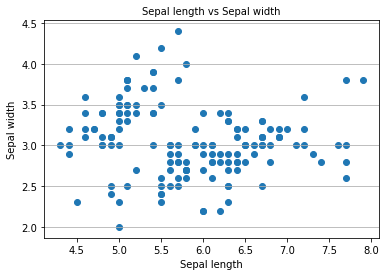

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Sepal length vs Sepal width',fontsize=10)
axis.set_xlabel('Sepal length',fontsize=10)
axis.set_ylabel('Sepal width',fontsize=10)

X = data_iris['sepal_length']
Y = data_iris['sepal_width']

axis.scatter(X, Y)
plt.show()

## Exercício 6

Faça um histograma de qualquer um dos quatro atributos. Nomeie os eixos e dê um título apropriado.

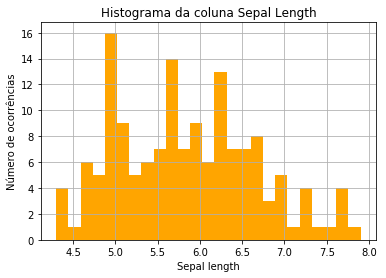

In [18]:

plt.hist(data_iris['sepal_length'], 25, normed=False, facecolor='orange')

plt.xlabel("Sepal length")
plt.ylabel('Número de ocorrências')
plt.title('Histograma da coluna Sepal Length')

plt.grid(True)

plt.show()

## Exercício 7

Agora crie um único gráfico com histogramas para cada atributo (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) sobrepostos. 

Dicas para fazer isso com os métodos de plotagem do Pandas se encontram em [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html).

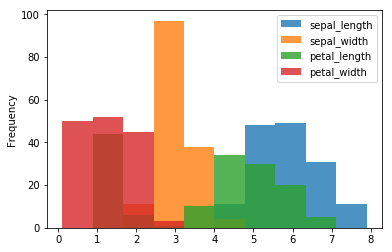

In [19]:
data_iris.plot.hist(alpha=0.8)

## Exercício 8

Usando Pandas, faça um boxplot de cada medida da pétala e sépala. Veja a documentação para algumas dicas [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

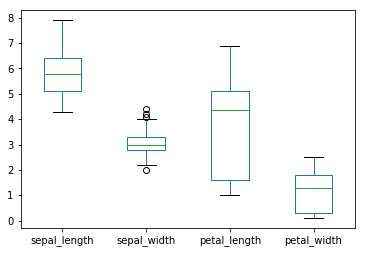

In [20]:
data_iris.plot.box()

## Exercício 9

Agora faça um único boxplot onde os atributos estão separados no eixo-x e as espécies são coloridas por tons de cores diferentes.

*Dica:* veja a documentação para [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Note que o Seaborn é bem exigente quanto ao formato dos dados--para esse plot funcionar, o dataframe de entrada precisa ser manipulado para que cada linha contenha um único ponto (uma espécie, um tipo de medida e um valor da medida). Veja o Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) como uma dica.

Um exemplo desse formato para essa base:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [21]:
import seaborn as sns

## Exercício 10

Faça um  [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) com o Seaborn para examinar a correlação entre cada uma das medidas.

*Dica:* esse plot pode parecer complicado, mas é na verdade uma única linha de código. Esse é o poder de expressabilidade do Seaborn junto do Pandas.

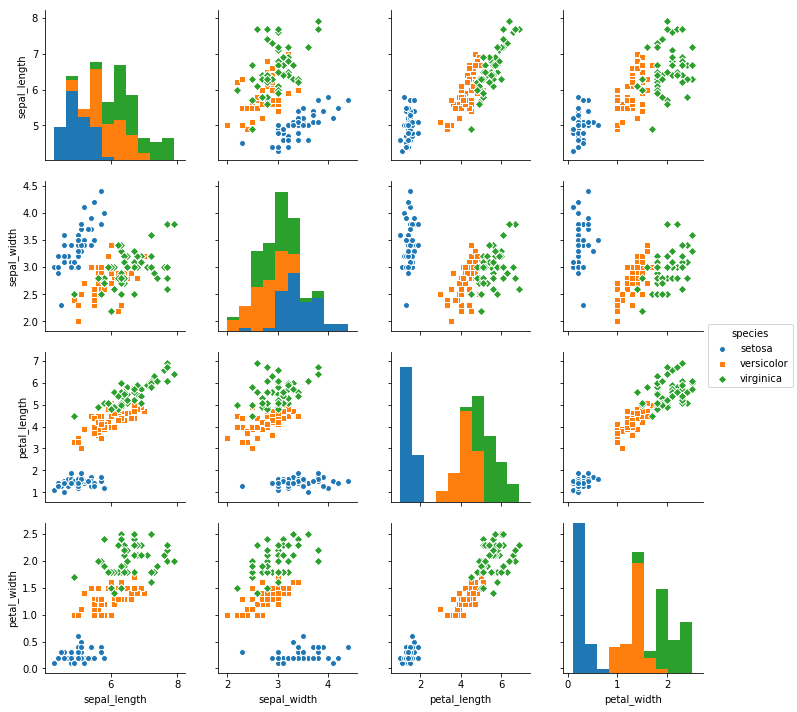

In [24]:
sns.pairplot(data_iris, hue="species", markers=["o", "s", "D"])